In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATA

In [2]:
#IMPORTING DATASET


import pandas as pd
df_train=pd.read_csv('train.csv')

df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
pd.DataFrame(df_train.label.unique()).values

array([[0],
       [1]])

# VISUALISATION

Percentage for labels/n
0    92.99
1     7.01
Name: label, dtype: float64


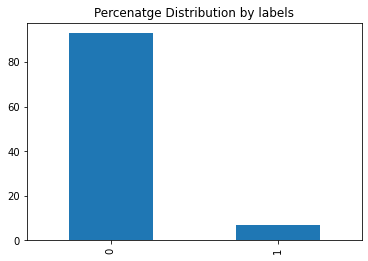

In [5]:
##Checking for the distribution of labels

import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for labels/n')
print(round(df_train.label.value_counts(normalize=True)*100,2))
round(df_train.label.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percenatge Distribution by labels')
plt.show()

# DATA PRE PROCESSING

In [6]:
#removing extra columns
df_train.drop(columns=['id'],inplace=True)

In [7]:
df_train.tweet=df_train.tweet.astype(str)


import numpy as np
import re
from nltk.tokenize import word_tokenize


####DATA PRE PROCESSING

# Step - a : Remove blank rows if any.
df_train['tweet'].dropna(inplace=True)

# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
df_train['tweet'] = [entry.lower() for entry in df_train['tweet']]

# Step - c : Remove twitter handles
# remove twitter handles after removing the pattern in tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
df_train['tweet_final1'] = np.vectorize(remove_pattern)(df_train['tweet'], "@[\w]*")

# Step - d : Tokenization : In this each entry in the corpus will be broken into set of words
df_train['tweet_final']= [word_tokenize(entry) for entry in df_train['tweet_final1']]

# or can also use : 
# tweet_token = df['clean_tweet'].apply(lambda x: x.split())

# Step - e : perfom Word Stemming/Lemmenting.
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

df_train['tweet_final'] = df_train['tweet_final'].apply(lambda sentence: [stemmer.stem(word) for word in sentence])
df_train.head()


,label,tweet,tweet_final1,tweet_final
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,"[when, a, father, is, dysfunct, and, is, so, s..."
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...,"[thank, for, #, lyft, credit, i, ca, n't, use,..."
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesti]"
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,"[#, model, i, love, u, take, with, u, all, the..."
4,0,factsguide: society now #motivation,factsguide: society now #motivation,"[factsguid, :, societi, now, #, motiv]"


In [8]:
df_train

,label,tweet,tweet_final1,tweet_final
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,"[when, a, father, is, dysfunct, and, is, so, s..."
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...,"[thank, for, #, lyft, credit, i, ca, n't, use,..."
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesti]"
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,"[#, model, i, love, u, take, with, u, all, the..."
4,0,factsguide: society now #motivation,factsguide: society now #motivation,"[factsguid, :, societi, now, #, motiv]"
...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...,"[ate, isz, that, youuu, ?, ððððð..."
31958,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...,"[to, see, nina, turner, on, the, airwav, tri, ..."
31959,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,"[listen, to, sad, song, on, a, monday, morn, o..."
31960,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso...","[#, sikh, #, templ, vandalis, in, in, #, calga..."


# Feature Extraction

In [9]:
#Feature Extraction


df_train['tweet_final']=df_train['tweet_final'].astype(str)

from sklearn.feature_extraction.text import CountVectorizer
vector1 = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
vector = vector1.fit_transform(df_train['tweet_final'])


# TRAINING THE MODEL

In [10]:
###DIVIDING THE DATASET INTO TRAIN-TEST

from sklearn.model_selection import train_test_split

X=vector
y=df_train.label

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
###TRAINING THE MODEL

from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)

LogisticRegression()

In [12]:

from sklearn.metrics import confusion_matrix,f1_score, accuracy_score
predictions=model.predict(X_test)

confusion_matrix(predictions, y_test)
f1_score(y_test, predictions)
accuracy_score(y_test,predictions)


0.9485869225153822

# EVALUATING THE MODEL

In [13]:
### EVALUATING THE MODEL


from sklearn.metrics import accuracy_score, precision_score, recall_score

print("accuracy:",accuracy_score(predictions,y_test))
print('Precision:',precision_score(predictions,y_test,average='weighted'))
print("recall:",recall_score(predictions, y_test,average='weighted'))



accuracy: 0.9485869225153822
Precision: 0.9703275409955678
recall: 0.9485869225153822


In [14]:
# Extracting racist and non-racist hashtag
def hashtag(tweet):
    list1 = []
    # loop words in the tweet
    for twitter_tweet in tweet:
        tag = re.findall(r"#(\w+)", twitter_tweet)
        list1.append(tag)
    return list1

# non-racist/sexist tweets hashtags
nonracist = hashtag(df_train['tweet_final1'][df_train['label']==0])
print(nonracist[0:10])

print('')
# extract hashtags from racist/sexist tweets
racist = hashtag(df_train['tweet_final1'][df_train['label']==1])
print(racist[0:10])

[['run'], ['lyft', 'disapointed', 'getthanked'], [], ['model'], ['motivation'], ['allshowandnogo'], [], ['school', 'exams', 'hate', 'imagine', 'actorslife', 'revolutionschool', 'girl'], ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'], ['gr8']]

[['cnn', 'michigan', 'tcot'], ['australia', 'opkillingbay', 'seashepherd', 'helpcovedolphins', 'thecove', 'helpcovedolphins'], [], [], ['neverump', 'xenophobia'], ['love', 'peace'], [], ['race', 'identity', 'medâ'], ['altright', 'whitesupremacy'], ['linguistics', 'race', 'power', 'raciolinguistics']]
